# ANÁLISIS DE DATOS MEDIANTE ANÁLISIS MULTIVARIANTE Y PRINICPIOS DE APRENDIZAJE DE MÁQUINA

## Integrantes:
- John Chiqui
- Martin Bojorque
## Tema: Salud Covid 19
## Objetivo: Descubrir conocimiento
## Dataset: https://www.covid19survivalcalculator.com/download
## Tipo de Problema de Aprendizaje: Clustering
## Medida de calidad: Varianza, Tiempo, Distorcion, Distribucion de Usuarios
## Metodo Propuesto:Tratamiento de ruido + Transformacion(Categorica, lineal) +reduccion(PCA)+Clustering+Visualizacion

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import ipyvolume as ipv
from numpy.linalg import svd
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from matplotlib import style
from scipy.spatial.distance import cdist
from sklearn import datasets
import time as time
import seaborn as sns
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
listo=['covid19_positive','covid19_symptoms','covid19_contact','asthma','kidney_disease','liver_disease','compromised_immune','heart_disease','lung_disease','diabetes','hiv_positive','hypertension','other_chronic','nursing_home','health_worker']
categorica=['country','sex','age','blood_type','insurance','race','income','immigrant','smoking','working','rate_reducing_mask_type']
lineal=['height','weight','bmi','contacts_count','house_count','public_transport_count','prescription_medication','risk_infection','risk_mortality','alcohol','cannabis','amphetamines','cocaine','lsd','mdma','worried','rate_reducing_risk_single','rate_reducing_risk_single_social_distancing','rate_reducing_risk_single_washing_hands','rate_reducing_risk_house','rate_reducing_risk_house_social_distancing','rate_reducing_risk_house_washing_hands','rate_reducing_risk_single_sanitizer','rate_reducing_mask','rate_government_action','rate_government_control','rate_government_spend']
df = pd.read_csv('master_dataset_final1.csv')
df.head()

,height,weight,bmi,contacts_count,house_count,public_transport_count,prescription_medication,risk_infection,risk_mortality,alcohol,...,liver_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker
0,178,88,27.7,0,4,0,0,5.0,0.050,-1,...,0,0,0,0,0,0,0,0,0,0
1,158,54,21.6,0,2,0,0,5.0,0.050,-1,...,0,0,0,0,0,0,0,0,0,0
2,184,94,27.7,0,4,0,0,12.0,14.701,-1,...,0,1,0,1,1,0,1,0,0,0
3,172,96,32.4,0,5,0,0,6.0,2.250,-1,...,0,0,0,0,1,0,1,0,0,0
4,166,70,25.4,0,7,0,0,5.0,0.050,-1,...,0,0,0,0,0,0,0,0,0,0


In [2]:
preprocesador = make_column_transformer(                                                   
            ('passthrough',lineal),     
            (OneHotEncoder(),categorica),
            ('passthrough',listo)
            )
preprocesado = preprocesador.fit_transform(df)
preprocesadof=preprocesado.toarray()
nombresColumnas = preprocesador.transformers_[1][1].get_feature_names(categorica)
lineal.extend(nombresColumnas)
lineal.extend(listo)
DatasetPreprocesado = pd.DataFrame(data=preprocesadof,columns=lineal)
DatasetPreprocesado.head()

,height,weight,bmi,contacts_count,house_count,public_transport_count,prescription_medication,risk_infection,risk_mortality,alcohol,...,liver_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker
0,178.0,88.0,27.7,0.0,4.0,0.0,0.0,5.0,0.050,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,158.0,54.0,21.6,0.0,2.0,0.0,0.0,5.0,0.050,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,184.0,94.0,27.7,0.0,4.0,0.0,0.0,12.0,14.701,-1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,172.0,96.0,32.4,0.0,5.0,0.0,0.0,6.0,2.250,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,166.0,70.0,25.4,0.0,7.0,0.0,0.0,5.0,0.050,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
preprocesador1 = make_column_transformer(                                  
                 (StandardScaler(),lineal)                                  
                )
preprocesado1 = preprocesador1.fit_transform(DatasetPreprocesado)
DatasetPreprocesado1 = pd.DataFrame(data=preprocesado1,columns=lineal)

In [ ]:
DatasetPreprocesado1.head()

In [4]:
preprocesador2 = make_column_transformer(                                  
                 (MinMaxScaler(),lineal)                                  
                )
preprocesado2 = preprocesador2.fit_transform(DatasetPreprocesado)
DatasetPreprocesado2 = pd.DataFrame(data=preprocesado2,columns=lineal)

In [5]:
DatasetPreprocesado2.to_csv('DataSetProcesado.csv')
DatasetPreprocesado2.head()

,height,weight,bmi,contacts_count,house_count,public_transport_count,prescription_medication,risk_infection,risk_mortality,alcohol,...,liver_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker
0,0.531250,0.323529,0.132287,0.0,0.363636,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.375000,0.073529,0.086697,0.0,0.181818,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.578125,0.367647,0.132287,0.0,0.363636,0.0,0.0,0.073684,0.195477,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.484375,0.382353,0.167414,0.0,0.454545,0.0,0.0,0.010526,0.029353,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.437500,0.191176,0.115097,0.0,0.636364,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
correlacion=DatasetPreprocesado2.corr()
correlacion=round(correlacion,3)
correlacion

,height,weight,bmi,contacts_count,house_count,public_transport_count,prescription_medication,risk_infection,risk_mortality,alcohol,...,liver_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker
height,1.000,0.388,-0.096,0.009,-0.057,0.006,-0.046,0.014,0.063,0.114,...,0.001,-0.058,0.022,-0.008,0.026,0.035,0.055,-0.055,-0.005,-0.006
weight,0.388,1.000,0.871,0.051,0.004,-0.003,0.097,0.030,0.122,-0.062,...,0.009,0.013,0.040,0.012,0.169,0.009,0.225,0.022,-0.005,-0.009
bmi,-0.096,0.871,1.000,0.050,0.031,-0.005,0.127,0.025,0.099,-0.120,...,0.008,0.044,0.031,0.017,0.166,-0.006,0.209,0.051,-0.003,-0.007
contacts_count,0.009,0.051,0.050,1.000,0.205,0.032,-0.012,0.317,-0.071,-0.006,...,-0.003,-0.024,-0.023,-0.020,-0.018,-0.006,-0.016,-0.024,0.002,0.092
house_count,-0.057,0.004,0.031,0.205,1.000,0.002,-0.042,0.047,-0.052,-0.059,...,-0.001,-0.004,-0.019,-0.019,-0.018,-0.021,-0.040,-0.013,0.019,-0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hiv_positive,0.035,0.009,-0.006,-0.006,-0.021,0.013,0.050,0.006,0.027,0.009,...,0.006,0.019,0.012,0.009,0.009,1.000,0.007,-0.004,0.002,-0.001
hypertension,0.055,0.225,0.209,-0.016,-0.040,0.001,0.204,0.023,0.207,-0.004,...,0.018,0.053,0.148,0.080,0.217,0.007,1.000,0.062,0.007,-0.000
other_chronic,-0.055,0.022,0.051,-0.024,-0.013,0.003,0.219,0.022,0.067,-0.054,...,0.020,0.263,0.060,0.074,0.064,-0.004,0.062,1.000,0.008,0.000
nursing_home,-0.005,-0.005,-0.003,0.002,0.019,0.021,-0.003,0.065,0.045,-0.005,...,0.021,0.004,0.017,0.006,0.008,0.002,0.007,0.008,1.000,0.015


In [ ]:
correlacion.to_csv('correlacion.csv')

In [ ]:
corr_salida=correlacion["covid19_positive"]
final=pd.DataFrame(corr_salida, columns=["covid19_positive"])
final.head()

In [ ]:
ascendente = final.sort_values('covid19_positive',ascending=False)
ascendente=ascendente.drop(['covid19_positive'],axis=0)
ascendente.head()

In [ ]:
ascendente.index
primeros=['covid19_positive','risk_infection', 'covid19_symptoms', 'covid19_contact', 'nursing_home',
       'risk_mortality', 'age_90_100', 'health_worker', 'age_80_90',
       'kidney_disease']
ultimos=['cannabis', 'insurance_no', 'working_stopped', 'immigrant_immigrant',
       'sex_female', 'country_US', 'race_other', 'income_none',
       'rate_reducing_risk_house', 'rate_reducing_risk_single']

In [ ]:
descendente = final.sort_values('covid19_positive',ascending=True)
descendente=descendente.drop(['covid19_positive'],axis=0)
descendente.head()

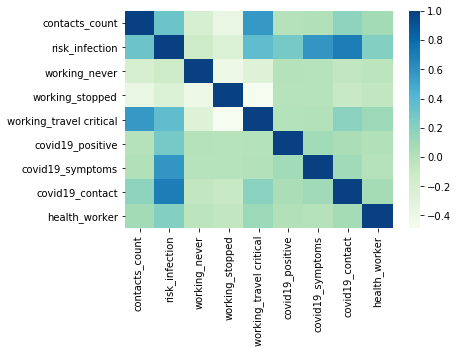

In [6]:
flista=['contacts_count','risk_infection','working_never','working_stopped','working_travel critical','covid19_positive'
,'covid19_symptoms','covid19_contact','health_worker']
unodataset = correlacion.filter(items=flista,axis=0)
unodataset = unodataset.filter(items=flista,axis=1)
sns.heatmap(unodataset,cmap="GnBu")

In [9]:
unodataset.filter(items=['risk_infection'],axis=1)

,risk_infection
contacts_count,0.317
risk_infection,1.000
working_never,-0.124
working_stopped,-0.245
working_travel critical,0.371
covid19_positive,0.275
covid19_symptoms,0.585
covid19_contact,0.701
health_worker,0.222


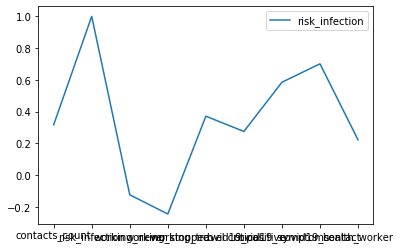

In [11]:
unodataset.filter(items=['risk_infection'],axis=1).plot()

In [ ]:
unodataset = correlacion.filter(items=primeros,axis=0)
unodataset = unodataset.filter(items=primeros,axis=1)
sns.heatmap(unodataset,cmap="GnBu")

In [ ]:
fig = plt.figure('Gráfica de barras') # Figure
rango = range(285)
fig = plt.figure()
plt.subplot(3,1, 1)
plt.scatter(rango, corr_salida, color='blue',linewidth = 1)
plt.title('Analisis de componentes')
plt.xlabel('# de Componente')
plt.ylabel('Correlacion')
plt.subplot(3,1, 3)
rango1 = range(10)
plt.scatter(rango1, corr_salida[0:10], color='blue',linewidth = 1)
plt.title('Analisis de componentes')
plt.xlabel('# de Componente')
plt.ylabel('Correlacion')
fig.savefig('correlacion.png')

In [ ]:
fig = plt.figure('Gráfica de barras') # Figure
ax = fig.add_subplot(111) # Axes
xx = range(6,8)
ax.bar(xx, corr_salida[6:8], width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(lineal[6:8])
plt.title('Analisis de componentes')
plt.xlabel('# de Componente')
plt.ylabel('Correlacion')
plt.show()
fig.savefig('barras.png')

In [6]:
pca1 = PCA()
componentes = pca1.fit_transform(DatasetPreprocesado2)
varianza=pca1.explained_variance_ratio_

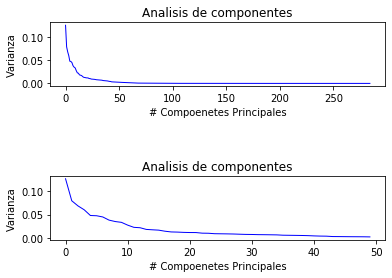

In [7]:
rango = range(285)
fig = plt.figure()
plt.subplot(3, 1, 1)
plt.plot(rango, varianza, color='blue',linewidth = 1)
plt.title('Analisis de componentes')
plt.xlabel('# Compoenetes Principales')
plt.ylabel('Varianza')
plt.subplot(3, 1, 3)
rango1 = range(50)
plt.plot(rango1, varianza[0:50], color='blue',linewidth = 1)
plt.title('Analisis de componentes')
plt.xlabel('# Compoenetes Principales')
plt.ylabel('Varianza')
plt.show()
fig.savefig('pcacodo.png')

In [ ]:
x = DatasetPreprocesado2.drop('covid19_positive', 1)  
y = DatasetPreprocesado2['covid19_positive']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
pca = PCA()  
x_train = pca.fit_transform(x_train)  
x_test = pca.transform(x_test) 
explained_variance = pca.explained_variance_ratio_

In [ ]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)  
print('accuracy: ' + str(accuracy_score(y_test, y_pred)))  

In [9]:
pcaF = PCA(50,lineal)
ComponentesPrincipales = pcaF.fit_transform(DatasetPreprocesado2)

In [10]:
DataSetPCA = pd.DataFrame(data=ComponentesPrincipales)
DataSetPCA.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.075128,1.427246,-0.171010,0.054903,-0.649533,-0.282130,0.720819,0.653346,0.955381,0.288942,...,0.308636,0.001830,0.141777,0.021601,-0.109449,0.004841,-0.014594,1.007117,-0.060121,0.076528
1,-0.021494,0.534866,-1.014775,0.107100,-0.273041,0.372972,-0.436563,1.397947,0.289747,0.020575,...,0.316675,-0.181413,0.066285,0.022250,-0.048103,-0.061462,-0.013702,-0.005878,-0.090015,-0.073111
2,0.137098,1.313553,0.091147,0.069898,-0.486721,0.228970,0.922744,1.201966,0.277102,0.141173,...,0.307305,-0.104854,0.073206,0.024570,0.051987,0.041870,-0.076789,-0.054178,-0.076929,0.139159
3,0.152327,1.532157,0.080020,-0.049228,-0.277756,-0.216770,0.411174,1.546766,0.129268,-0.018170,...,0.250414,-0.143540,0.058010,0.017323,-0.314447,0.003954,-0.032129,-0.007303,-0.135100,0.131329
4,0.099656,1.301691,-0.005038,0.067013,-0.687335,0.845927,0.162447,1.017094,0.524700,0.195259,...,0.323444,-0.133419,0.110359,0.019122,-0.202079,0.064213,-0.030675,-0.128429,-0.150631,0.238304


In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=0)
x_train1 = pcaF.fit_transform(x_train1)  
x_test1 = pcaF.transform(x_test1) 
explained_variance1 = pcaF.explained_variance_ratio_

In [ ]:
classifier1 = RandomForestClassifier(max_depth=2, random_state=0)  
classifier1.fit(x_train1, y_train1)
y_pred1 = classifier1.predict(x_test1)

In [ ]:
cm1 = confusion_matrix(y_test1, y_pred1)  
print('accuracy: ' + str(accuracy_score(y_test1, y_pred1)))  

In [ ]:
DataSetPCA.describe(include="all")

In [ ]:
DataSetPCA.corr()

In [ ]:
varianza1=pcaF.explained_variance_ratio_
totalVar=varianza1.sum()
varianza=np.array([varianza1[i]/totalVar for i in range(50)])
varianzaCUM=pcaF.explained_variance_ratio_.cumsum()

In [ ]:
rango2=range(50)
plt.plot(rango2, varianza, color='blue', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=5, label = 'explained variance')
plt.plot(rango2, varianzaCUM, color='orange', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=5, label = 'cumulative explained variance')
plt.ylim((0,1.2))
plt.title('Variance with '+str(50)+' principal components')
plt.xlabel('Principal Component ID')
plt.ylabel('Variance')
plt.legend(loc="upper right")
plt.show()

In [11]:
K_range=range(2,25,1)
distortions=[]
tiempo=[]
for i in K_range:
    tiempo_inicial=time.time()
    kmeanModel = KMeans(n_clusters=i,init='k-means++')
    kmeanModel.fit(DataSetPCA)
    distortions.append(sum(np.min(cdist(DataSetPCA, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / DataSetPCA.shape[0])
    tiempo_final=time.time()
    tiempo.append(tiempo_final-tiempo_inicial)

In [ ]:
fig1=plt.figure()
ex = fig1.add_subplot(111)
ex.plot(K_range, distortions, 'b*-')
plt.grid(True)
plt.xlabel('Numero de Klusters')
plt.ylabel('Distorcion')
plt.title('Metodo del Codo')
fig1.savefig('codocluster.png')

In [12]:
def doKmeans1(DataSetPCA, nclust=25, init='k-means++',max_iter=50, tol=0.0001, random_state=10, algorithm='full'):
    model = KMeans(nclust)
    model.fit(DataSetPCA)
    clust_labels = model.predict(DataSetPCA)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans1(DataSetPCA, 25, init='k-means++',max_iter=50, tol=0.0001, random_state=10, algorithm='full' )
kmeans1 = pd.DataFrame(clust_labels,columns=['Grupos'])
kmeans1

,Grupos
0,14
1,1
2,14
3,14
4,14
...,...
774894,10
774895,9
774896,19
774897,10


In [38]:
DataSetGrupos=pd.concat([DataSetPCA,kmeans1],axis=1)
DataSetGrupos.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Grupos
0,0.075128,1.427246,-0.171010,0.054903,-0.649533,-0.282130,0.720819,0.653346,0.955381,0.288942,...,0.001830,0.141777,0.021601,-0.109449,0.004841,-0.014594,1.007117,-0.060121,0.076528,14
1,-0.021494,0.534866,-1.014775,0.107100,-0.273041,0.372972,-0.436563,1.397947,0.289747,0.020575,...,-0.181413,0.066285,0.022250,-0.048103,-0.061462,-0.013702,-0.005878,-0.090015,-0.073111,1
2,0.137098,1.313553,0.091147,0.069898,-0.486721,0.228970,0.922744,1.201966,0.277102,0.141173,...,-0.104854,0.073206,0.024570,0.051987,0.041870,-0.076789,-0.054178,-0.076929,0.139159,14
3,0.152327,1.532157,0.080020,-0.049228,-0.277756,-0.216770,0.411174,1.546766,0.129268,-0.018170,...,-0.143540,0.058010,0.017323,-0.314447,0.003954,-0.032129,-0.007303,-0.135100,0.131329,14
4,0.099656,1.301691,-0.005038,0.067013,-0.687335,0.845927,0.162447,1.017094,0.524700,0.195259,...,-0.133419,0.110359,0.019122,-0.202079,0.064213,-0.030675,-0.128429,-0.150631,0.238304,14


In [39]:
x=DataSetGrupos['Grupos'] == 11
DataGrupo=DataSetGrupos[x]
DataGrupo.to_csv('datasetGrupo.csv')
DataGrupo.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Grupos
101,-0.318777,-0.772734,0.204260,0.218091,0.838700,0.061273,0.550721,0.820382,0.404002,0.094147,...,0.064216,0.049785,0.004705,-0.126450,-0.039987,-0.012182,-0.029823,-0.037117,-0.049994,11
113,-0.403098,-0.652639,0.059553,0.353937,0.494196,0.871974,0.093311,0.556385,0.725516,-0.573368,...,-0.060934,-0.149395,-0.010406,-0.099545,0.017933,-0.013661,-0.012864,0.036372,0.015338,11
285,-0.336673,-0.388539,0.030461,0.135112,0.952565,-0.407177,-0.017926,1.172093,0.159803,-0.109011,...,-0.071266,-0.147203,-0.009631,0.648345,-0.306480,0.128109,-0.026349,0.133580,0.083230,11
295,-0.301272,-0.908402,0.169120,0.034366,-0.175053,-0.333871,0.600748,0.866117,-0.347671,-0.041229,...,0.042364,0.254209,0.024376,0.018244,-0.058449,-0.006479,-0.113485,-0.136026,-0.123846,11
301,-0.373436,-0.742510,0.202488,0.237927,0.705559,-0.009691,0.485525,0.741144,0.435160,0.096098,...,-0.101545,-0.156642,-0.002075,0.094093,0.130635,-0.039616,-0.058466,0.030925,0.185111,11


In [41]:
b=DataGrupo.describe()
b

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Grupos
count,59838.000000,59838.000000,59838.000000,59838.000000,59838.000000,59838.000000,59838.000000,59838.000000,59838.000000,59838.000000,...,59838.000000,59838.000000,59838.000000,59838.000000,59838.000000,59838.000000,59838.000000,59838.000000,59838.000000,59838.0
mean,-0.338185,-0.666427,0.088912,0.189259,0.134792,-0.023829,0.284689,0.816573,0.300476,0.018841,...,0.002623,-0.000374,-0.001186,-0.006311,0.002784,-0.000121,0.000066,-0.002587,-0.006972,11.0
std,0.062631,0.150778,0.135666,0.118921,0.533429,0.457270,0.461708,0.260734,0.384742,0.484497,...,0.158200,0.139144,0.024234,0.232499,0.151817,0.138624,0.138832,0.077093,0.135257,0.0
min,-0.502864,-1.213917,-0.559258,-0.176161,-0.691883,-1.192845,-0.946120,-0.052341,-0.848740,-0.780142,...,-0.497071,-0.563589,-0.733082,-0.443471,-0.579940,-0.989693,-0.159465,-0.724355,-0.671276,11.0
25%,-0.369743,-0.778546,0.006779,0.109624,-0.357323,-0.351634,-0.079094,0.641560,0.104803,-0.409277,...,-0.104640,-0.096343,-0.009931,-0.111507,-0.048556,-0.016559,-0.024690,-0.057397,-0.086244,11.0
50%,-0.340298,-0.686629,0.095578,0.180410,-0.079094,-0.019675,0.379729,0.823125,0.313991,-0.010874,...,-0.018267,-0.006582,0.000012,-0.065224,-0.009983,-0.002882,-0.011716,-0.001654,-0.025452,11.0
75%,-0.311702,-0.569589,0.180862,0.270719,0.664014,0.229007,0.653456,0.974351,0.548360,0.201104,...,0.085526,0.084579,0.009413,-0.017128,0.029688,0.013244,-0.005622,0.050477,0.051928,11.0
max,1.242511,0.104688,0.846256,0.778358,1.348733,1.027166,1.307544,1.657918,1.496556,1.083850,...,1.070134,0.902939,0.787013,1.563693,1.523854,0.987894,1.042780,0.735049,1.195692,11.0


In [13]:
UserGrupoK=kmeans1.groupby(kmeans1.Grupos).Grupos.count()
UserGrupoK=UserGrupoK.sort_values(ascending=False, inplace=False, kind='quicksort')
UserGrupoK

Grupos
11    59838
22    49846
8     40570
2     37640
15    36872
24    36002
13    35925
6     34762
5     34538
9     33087
21    32908
23    30228
10    30059
0     29558
17    28685
18    25512
14    25402
12    24887
1     22884
20    22213
7     21348
16    21273
3     21117
19    20645
4     19100
Name: Grupos, dtype: int64

In [31]:
UserGrupoK.index

Int64Index([11, 22,  8,  2, 15, 24, 13,  6,  5,  9, 21, 23, 10,  0, 17, 18, 14,
            12,  1, 20,  7, 16,  3, 19,  4],
           dtype='int64', name='Grupos')

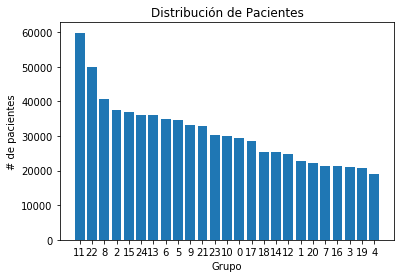

In [37]:
fig = plt.figure(u'Gráfica de barras') # Figure
ax = fig.add_subplot(111) # Axes
ax.bar(range(0,25), UserGrupoK, width=0.8, align='center')
ax.set_xticks(range(0,25))
ax.set_xticklabels(UserGrupoK.index)
plt.ylabel('# de pacientes')
plt.xlabel('Grupo')
plt.title('Distribución de Pacientes')
plt.show()

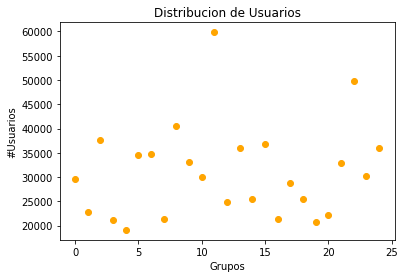

In [23]:
grupo=UserGrupoK.index.tolist()
valores=UserGrupoK.values.tolist()
plt.rcParams.update({'font.size': 10})
plt.scatter(grupo,valores, color='orange', marker='o')
plt.title("Distribucion de Usuarios")
plt.xlabel("Grupos")
plt.ylabel("#Usuarios")
plt.show()

In [ ]:
num_components=2
pca2 = PCA(num_components)
principalComponents = pca2.fit_transform(DataSetPCA)
principalDf = pd.DataFrame(data = principalComponents)
principalDf=round(principalDf, 2)
clust_labels, cent = doKmeans1(principalDf, 3)
kmeans = pd.DataFrame(clust_labels)
kmeans
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(principalDf[0],principalDf[1],c=kmeans[0],s=25)
ax.set_title('K-Means Clustering')
ax.set_xlabel('1ER FACTOR')
ax.set_ylabel('2DO FACTOR')
plt.colorbar(scatter)

In [ ]:
num_components=25
pca2 = PCA(num_components)
principalComponents = pca2.fit_transform(DataSetPCA)
principalDf = pd.DataFrame(data = principalComponents)
principalDf=round(principalDf, 2)
clust_labels, cent = doKmeans1(principalDf, 3)
kmeans = pd.DataFrame(clust_labels)
kmeans
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(principalDf[0],principalDf[1],c=kmeans[0],s=25)
ax.set_title('K-Means Clustering')
ax.set_xlabel('1ER FACTOR')
ax.set_ylabel('2DO FACTOR')
plt.colorbar(scatter)

In [ ]:
rango3=range(0,23)
plt.plot(rango3, tiempo, color='blue', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=5)
plt.title('Klusters VS Tiempo')
plt.xlabel('Klusters')
plt.ylabel('Tiempo sg')
plt.show()

In [ ]:
nombres3=["Componente 1","Componente 2","Componente 3"]
pca3 = PCA(3)
ComponentesPrincipales3 = pca3.fit_transform(DataSetPCA)
DataSetPCA3 = pd.DataFrame(data=ComponentesPrincipales3,columns=nombres3)
DataSetPCA3.head()

In [ ]:
preprocesador2 = make_column_transformer(
    (StandardScaler(),nombres3)    
    )
base3 = preprocesador2.fit_transform(DataSetPCA3)
DataSetPreprocesado3 = pd.DataFrame(data=base3,columns=nombres3)
DataSetPreprocesado3.head()

In [ ]:
def doKmeans2(DataSetPreprocesado3, nclust=25):
    model = KMeans(nclust)
    model.fit(DataSetPreprocesado3)
    clust_labels = model.predict(DataSetPreprocesado3)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans2(DataSetPreprocesado3, 16)
kmeans3 = pd.DataFrame(clust_labels,columns=["resultado"])
kmeans3

In [ ]:
DataSetGrupos=pd.concat([DataSetPreprocesado3,kmeans3],axis=1)
DataSetGrupos.head()

In [ ]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(111, projection='3d')
ax1.set_xlabel('Componente Principal 1', fontsize=10)
ax1.set_ylabel('Componente Principal 2', fontsize=10)
ax1.set_zlabel('Componente Principal 3', fontsize=10)
ax1.set_title('K-Means Clustering',fontsize=15)
resultados=range(0,16)
colors=['r','g','y','b','c','m','k','purple','pink','brown','gray','olive','bisque']
for resultado, color in zip(resultados,colors):
    indicesToKeep = DataSetGrupos['resultado'] == resultado
    ax1.scatter(DataSetGrupos.loc[indicesToKeep, 'Componente 1']
               , DataSetGrupos.loc[indicesToKeep, 'Componente 2']
               , DataSetGrupos.loc[indicesToKeep, 'Componente 3']
               , c=color
               , s=50)
ax1.grid()
plt.show()

## Analisis y discucion:

### Articulo:

Machine learning han contribuido con muchas de los problemas reales en el mundo, por ahora esto ha sido muy importante ya que este proceso ayuda a verificar ciertos factores que estamos viviendo en la actualidad que se trata sobre el COVID- 19 que es una pandemia a nivel global, ¿como el procesamiento ayudara a esto?, entonces vamos a aplicar algunas técnicas como: LR LASSO, SVM que nos proveerán la visualización de resultados pero no todo es correcto ya que algunos métodos nos permitirán tener mejores resultados, en el caso de Linear Regression permitirá tomar un conjunto de datos que van a ser de entranmiento (data training), y con eso hacer predicciones de tipo: cuantas personas están con COVID positivo, cuantas se han recuperado, y el numero de muertes, asi como permitir la previsión de nuevos casos que nos permitan saber cuantas personas se podría contagiar con el pasar de los días.

#### Cita 

url:https://ieeexplore.ieee.org/document/9099302
@article{rustam2020covid,
  title={COVID-19 Future Forecasting Using Supervised Machine Learning Models},
  author={Rustam, Furqan and Reshi, Aijaz Ahmad and Mehmood, Arif and Ullah, Saleem and On, Byungwon and Aslam, Waqar and Choi, Gyu Sang},
  journal={IEEE Access},
  year={2020},
  publisher={IEEE}
}

### Articulo: 

La Pandemia COVID-19 como a afectado los sectores públicos y privados ya que la situación actual es evitar el contagio para que asi no haya un colapso pero por otra parte, esto a afectado no solo al comercio mundial sino la situación en la educación ya que, tanto los profesores como estudiantes, deben contribuir al aprendizaje y encontrar nuevos métodos de e-learning, entonces ya no se puede tener una interacción cara a cara con un profesor o viceversa entonces es un gran trabajo para la situación actual, asi que como afecta esto a los estudiantes, en base a una encuesta y el análisis se determinara un resultado que mostrara algunas emocione y estados del estudiante ya que, si bien las clases son virtuales tienen algunas situaciones negativas o positivas, ya que ciertos porcentajes permiten conocer que los alumnos que se quedan en casa ayudan a mantener una rutina, y otros simplemente les parece cansado ya que afecta su salud mental o emocional debido a no tener contacto social.

#### Cita

url:https://ieeexplore.ieee.org/document/9099302
@inproceedings{khattar2020effects,
    title={Effects of the Disastrous Pandemic COVID 19 on Learning Styles, Activities and Mental Health of Young Indian       Students-A Machine Learning Approach},
    author={Khattar, Anuradha and Jain, Priti Rai and Quadri, SMK},
    booktitle={2020 4th International Conference on Intelligent Computing and Control Systems (ICICCS)},
    pages={1190--1195},
    year={2020},
    organization={IEEE}
    
### Articulo:

#### Cita

https://ieeexplore.ieee.org/document/9115663
Nombre: Artificial Intelligence and COVID-19: Deep Learning Approaches for Diagnosis and Treatment
@article{jamshidi2020artificial,
  title={Artificial Intelligence and COVID-19: Deep Learning Approaches for Diagnosis and Treatment},
  author={Jamshidi, Mohammad and Lalbakhsh, Ali and Talla, Jakub and Peroutka, Zden{\v{e}}k and Hadjilooei, Farimah and Lalbakhsh, Pedram and Jamshidi, Morteza and La Spada, Luigi and Mirmozafari, Mirhamed and Dehghani, Mojgan and others},
  journal={IEEE Access},
  volume={8},
  pages={109581--109595},
  year={2020},
  publisher={IEEE}
}

### Articulo:

Como contribuye el analisis de datos para enfrentar al COVID o hacer predicciones de una población que permita hacer un significante plan de control de medidas para el control de la enfermadar COVID, esto mejora ya que es mas preciso que hacer un plan estratégico solo basado en la transmisión de humano a humano, otra utilidad de analizar los datos y sacarle el máximo provecho es que se puede ver en que área hay mas contagiados y como exponerse menos, si bien es cierto que es invitable no contagiarse por lo menos podría mantener o disminuir la cifra de contagiados debido a la estimación de contagios por áreas. Por otra parte también es indispensable conocer que el análisis de datos puede a llevar a descubrir como tratar a ciertas personas que tiene COVID y mejorar el tratamiento.

#### Cita

https://sci-hub.tw/https://ieeexplore.ieee.org/document/9141265

Pham, Quoc-Viet, et al. "Artificial Intelligence (AI) and Big Data for Coronavirus (COVID-19) Pandemic: A Survey on the State-of-the-Arts." (2020). 

### Articulo:

#### Cita

https://sci-hub.tw/https://ieeexplore.ieee.org/document/9144400

### Articulo:

Metodos que ayudan a la detección si un paciente tiene COVID es la de un X-Ray ya que con los datos que se tiene de casos precedentes se alamancen en un conjunto de datos (dataset), esto se separa en dos secciones las iamgenes que contiene pacientes con COVID positivo y las que están con COVID negativo, se hace una  clasificacion y cuando le introducen mas iamgenes se procesa y ayudan a determinar si un paciente esta o no infectado, es una gran ayuda para poder tratar a un paciente.

#### Cita

https://d1wqtxts1xzle7.cloudfront.net/63696891/IJCST-V8I3P1320200621-76210-wvbke5.pdf?1592759082=&response-content-disposition=inline%3B+filename%3DIJCST-V8I3P13_Pranali_Manapure_Kiran_Li.pdf&Expires=1595553587&Signature=XgIc98nRCp9IggccQCYq-CbL4z4qP055nwzGBrCukZU5e01zXU6DPbs2hB560Fvr1y68h1eZrmpkqEDPJPdDkPUDyB1U6Bk3hFleSYKN9nU11IvOOyRdndzLoDnNwno0rmCfjGTfniiMn14Asg~35QcKe6Q8KUN2g2wCfwuxAkw5uuwK-ONt0Wj0CwO~d1kxtTGEUZoINqUhk5C2rMYsaGRkPVnyK7fA17BwApwLEn8FKuTfB1LL2TZMTW5CVTTRWJ4Qky~1aTIl8szZoZeEz2O~eBqzrA5fNVnUsXQ6VX0qmRBIeSe9LeCXLpF8-GXlCf0KF4864c4~6aJwRfjWtQ__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA
@article{manapuredetecting,
  title={Detecting COVID-19 in X-ray images with Keras, Tensor Flow, and Deep Learning},
  author={Manapure, Pranali and Likhar, Kiran and Kosare, Hemlata}
}

### Articulo:

#### Cita

Analysis of Deep Learning Techniques for COVID-19 Detection
https://d1wqtxts1xzle7.cloudfront.net/62774071/Analysis_of_Deep_Learning_Techniques_for_COVID-19_Detection_220200402-44553-5ed4hl.pdf?1585886172=&response-content-disposition=inline%3B+filename%3DAnalysis_of_Deep_Learning_Techniques_for.pdf&Expires=1595554126&Signature=QGr9K~lUGYGAX764Dbwl5lzh5nu1-u~MNwI5jXfBykpsdEOrnjXANXNF-yKrhNXPFmJ5NDtXcVnGWuJy-NTHBbjq6sbS~ckF8d8LnSeJ9g8q-GEZMol~~Yx0QEsDVyr7uIi43r044ZEFy3vI3FvdifiHCZ6NE9Ll2WvT8RdJGEllJE9XPvHa42m~H0XF-zGY3tUAxBR0lMlpJADbymLPKpalbkoiKe7QUGIOza7633sfq0nys4B0QE4CL5LJmGEHWkp~TJgTm5MCJNKmXuZMZekgsQ8dClZHr2e~pl6PxSumywG31CB8pECEnQaEfgFfm-VeLKT1l9HSlANtPhYkFw__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA

@article{aroraanalysis,
  title={Analysis of Deep Learning Techniques for COVID-19 Detection},
  author={Arora, Kawal and Bist, Ankur Singh and Chaurasia, Saksham and Prakash, Roshan}
}

### Articulo:

#### Cita

https://sci-hub.tw/https://ieeexplore.ieee.org/document/9144400

### Articulo:

#### Cita

https://sci-hub.tw/https://ieeexplore.ieee.org/document/9099443

@article{rehm2020leveraging,
  title={Leveraging IoTs and Machine Learning for Patient Diagnosis and Ventilation Management in the Intensive Care Unit},
  author={Rehm, Gregory B and Woo, Sang Hoon and Chen, Xin Luigi and Kuhn, Brooks T and Cortes-Puch, Irene and Anderson, Nicholas R and Adams, Jason Y and Chuah, Chen-Nee},
  journal={IEEE Pervasive Computing},
  year={2020},
  publisher={IEEE}
}

### Articulo:

#### Cita

https://sci-hub.tw/10.1109/tmi.2020.2996256

@article{han2020accurate,
  title={Accurate Screening of COVID-19 using Attention Based Deep 3D Multiple Instance Learning},
  author={Han, Zhongyi and Wei, Benzheng and Hong, Yanfei and Li, Tianyang and Cong, Jinyu and Zhu, Xue and Wei, Haifeng and Zhang, Wei},
  journal={IEEE Transactions on Medical Imaging},
  year={2020},
  publisher={IEEE}
}

### Articulo:

#### Cita

https://sci-hub.tw/https://ieeexplore.ieee.org/document/9112671

@article{jelodar2020deep,
  title={Deep sentiment classification and topic discovery on novel coronavirus or covid-19 online discussions: Nlp using lstm recurrent neural network approach},
  author={Jelodar, Hamed and Wang, Yongli and Orji, Rita and Huang, Hucheng},
  journal={arXiv preprint arXiv:2004.11695},
  year={2020}
}

### Articulo:

#### Cita

https://sci-hub.tw/https://ieeexplore.ieee.org/document/9104899

@article{fiaidhi2020envisioning,
  title={Envisioning Insight-Driven Learning Based on Thick Data Analytics With Focus on Healthcare},
  author={Fiaidhi, Jinan},
  journal={IEEE Access},
  volume={8},
  pages={114998--115004},
  year={2020},
  publisher={IEEE}
}

### Articulo:

#### Cita

https://sci-hub.tw/https://ieeexplore.ieee.org/document/9137691
@article{marmarelis2020predictive,
  title={Predictive modeling of Covid-19 data in the US: Adaptive phase-space approach},
  author={Marmarelis, Vasilis},
  journal={IEEE Open Journal of Engineering in Medicine and Biology},
  year={2020},
  publisher={IEEE}
}

### Articulo:

#### Cita

https://www.sciencedirect.com/science/article/pii/S2666389920300945

### Articulo:

#### Cita

https://www.sciencedirect.com/science/article/pii/S0960077920304562

@article{guan2020clinical,
  title={Clinical characteristics of coronavirus disease 2019 in China},
  author={Guan, Wei-jie and Ni, Zheng-yi and Hu, Yu and Liang, Wen-hua and Ou, Chun-quan and He, Jian-xing and Liu, Lei and Shan, Hong and Lei, Chun-liang and Hui, David SC and others},
  journal={New England journal of medicine},
  volume={382},
  number={18},
  pages={1708--1720},
  year={2020},
  publisher={Mass Medical Soc}
}

### Articulo:

#### Cita

https://www.sciencedirect.com/science/article/pii/S0960077920304550

@article{li2020early,
  title={Early transmission dynamics in Wuhan, China, of novel coronavirus--infected pneumonia},
  author={Li, Qun and Guan, Xuhua and Wu, Peng and Wang, Xiaoye and Zhou, Lei and Tong, Yeqing and Ren, Ruiqi and Leung, Kathy SM and Lau, Eric HY and Wong, Jessica Y and others},
  journal={New England Journal of Medicine},
  year={2020},
  publisher={Mass Medical Soc}
}

### Articulo:

#### Cita

https://www.sciencedirect.com/science/article/pii/S258975002030162X
@article{colombi2020well,
  title={Well-aerated lung on admitting chest CT to predict adverse outcome in COVID-19 pneumonia},
  author={Colombi, Davide and Bodini, Flavio C and Petrini, Marcello and Maffi, Gabriele and Morelli, Nicola and Milanese, Gianluca and Silva, Mario and Sverzellati, Nicola and Michieletti, Emanuele},
  journal={Radiology},
  pages={201433},
  year={2020},
  publisher={Radiological Society of North America}
}

### Articulo:

#### Cita

https://www.sciencedirect.com/science/article/pii/S1871402120301272

@article{wang2020deep,
  title={A deep learning algorithm using CT images to screen for Corona Virus Disease (COVID-19)},
  author={Wang, Shuai and Kang, Bo and Ma, Jinlu and Zeng, Xianjun and Xiao, Mingming and Guo, Jia and Cai, Mengjiao and Yang, Jingyi and Li, Yaodong and Meng, Xiangfei and others},
  journal={MedRxiv},
  year={2020},
  publisher={Cold Spring Harbor Laboratory Press}
}

### Articulo:

#### Cita

https://www.sciencedirect.com/science/article/pii/S0010482520301645

@article{sun2017automatic,
  title={Automatic feature learning using multichannel ROI based on deep structured algorithms for computerized lung cancer diagnosis},
  author={Sun, Wenqing and Zheng, Bin and Qian, Wei},
  journal={Computers in biology and medicine},
  volume={89},
  pages={530--539},
  year={2017},
  publisher={Elsevier}
}
